In [109]:
from keras.datasets import mnist

In [110]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [111]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [112]:
print("Shapes : \n",train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shapes : 
 (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

In [114]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

test_y = to_categorical(test_y)
train_y = to_categorical(train_y)

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = np.expand_dims(train_X, axis=-1)
test_X = np.expand_dims(test_X, axis=-1)

train_X.shape, train_y.shape

((60000, 28, 28, 1), (60000, 10))

In [115]:
nets = 3
model = [0]*3

for i in range(3) :
    
    model[i] = Sequential()
    model[i].add(Conv2D(24, kernel_size = 5, padding = "same", activation = 'relu', input_shape = (28,28,1)))
    model[i].add(MaxPool2D())
     
    if i>0 :
        model[i].add(Conv2D(48, kernel_size = 5, padding = 'same', activation = 'relu'))
        model[i].add(MaxPool2D())

    if i>1 :
        model[i].add(Conv2D(64, kernel_size = 5, padding = 'same', activation = 'relu'))
        model[i].add(MaxPool2D(padding = 'same'))
 
    model[i].add(Flatten())
    model[i].add(Dense(256, activation = 'relu'))
    model[i].add(Dense(10, activation = 'softmax'))
     
    model[i].compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


for i in range(3) :
    print(model[i].summary())

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 28, 28, 24)        624       
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 14, 14, 24)        0         
_________________________________________________________________
flatten_72 (Flatten)         (None, 4704)              0         
_________________________________________________________________
dense_144 (Dense)            (None, 256)               1204480   
_________________________________________________________________
dense_145 (Dense)            (None, 10)                2570      
Total params: 1,207,674
Trainable params: 1,207,674
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_77"
_________________________________________________________________
Layer (type)   

In [116]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.3)

model_names = ['CP', 'CP2', 'CP3']
epochs = 20
acc = [0]*nets

for i in range(3) :
    acc[i] = model[i].fit(train_X, train_y, epochs = 20, batch_size = 80, validation_data = (val_X, val_y), callbacks = [annealer], verbose = 0)
    print(model_names[i], ' : \n', 'Train Accuracy :', max(acc[i].history['accuracy']), '\nValidation Accuracy :',max(acc[i].history['val_accuracy']))


CP  : 
 Train Accuracy : 1.0 
Validation Accuracy : 0.9907222390174866
CP2  : 
 Train Accuracy : 1.0 
Validation Accuracy : 0.9934444427490234
CP3  : 
 Train Accuracy : 1.0 
Validation Accuracy : 0.9931666851043701


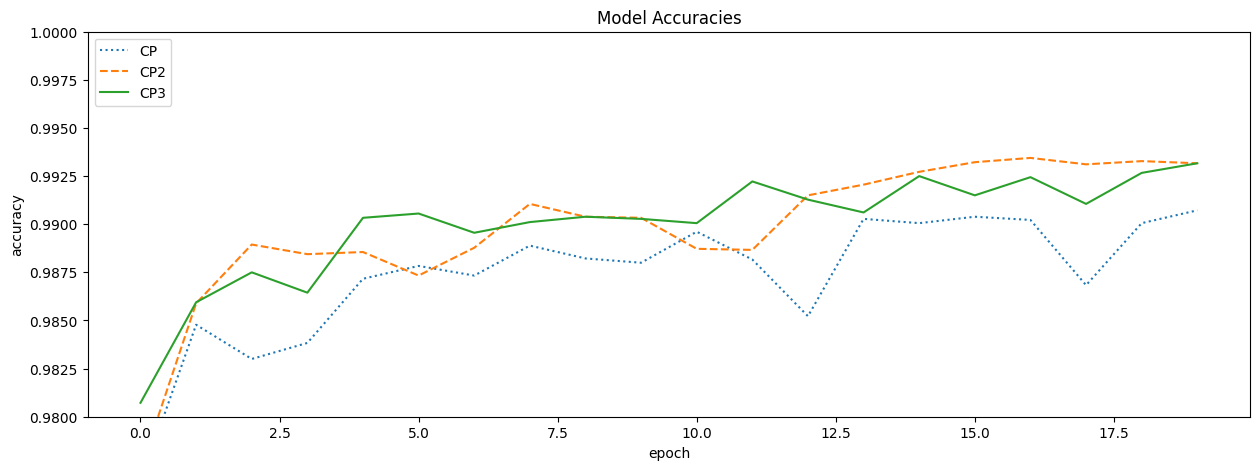

In [117]:
#plotting

styles = [':','--','-']

plt.figure(figsize = (15,5))
for i in range(nets) :
    plt.plot(acc[i].history['val_accuracy'], linestyle = styles[i])
plt.title('Model Accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(model_names, loc = 'upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()